### Preload Data and Process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.duplicated().sum()

1081

In [7]:
duplicates=data.duplicated()
duplicate_index=data[duplicates].index
print("Indicated duplicated rows :", duplicate_index)

Indicated duplicated rows : Index([    33,     35,    113,    114,    115,    221,    223,   1178,   1180,
         1382,
       ...
       282210, 282211, 282212, 282213, 282985, 282987, 283483, 283485, 284191,
       284193],
      dtype='int64', length=1081)


In [8]:
data=data.drop_duplicates()

In [9]:
data.shape

(283726, 31)

### Exploratory Data Analysis

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

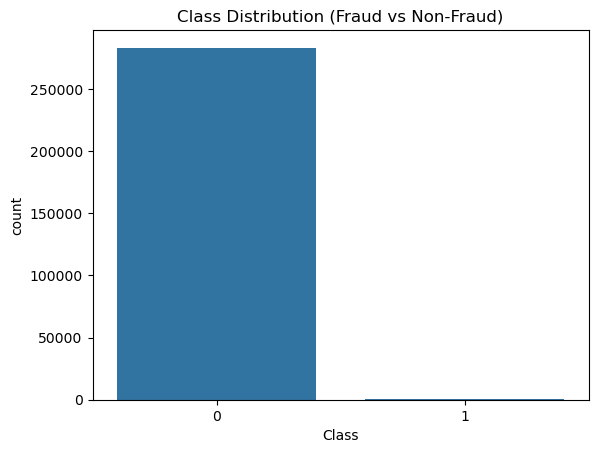

In [11]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

Text(0.5, 1.0, 'Amount Distributions: Fraud vs Non-Fraud')

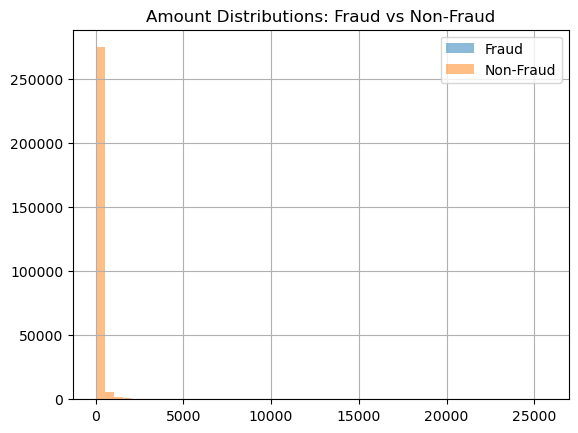

In [12]:
fraud =data[data['Class'] == 1]
non_fraud =data[data['Class'] == 0]

fraud['Amount'].hist(alpha=0.5, label='Fraud', bins=50)
non_fraud['Amount'].hist(alpha=0.5, label='Non-Fraud', bins=50)
plt.legend()
plt.title('Amount Distributions: Fraud vs Non-Fraud')

In [13]:
corr_matrix = data.corr()
print("Correlation Matrix Value :", corr_matrix)

Correlation Matrix Value :             Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248

Text(0.5, 1.0, 'Correlation Matrix of Features')

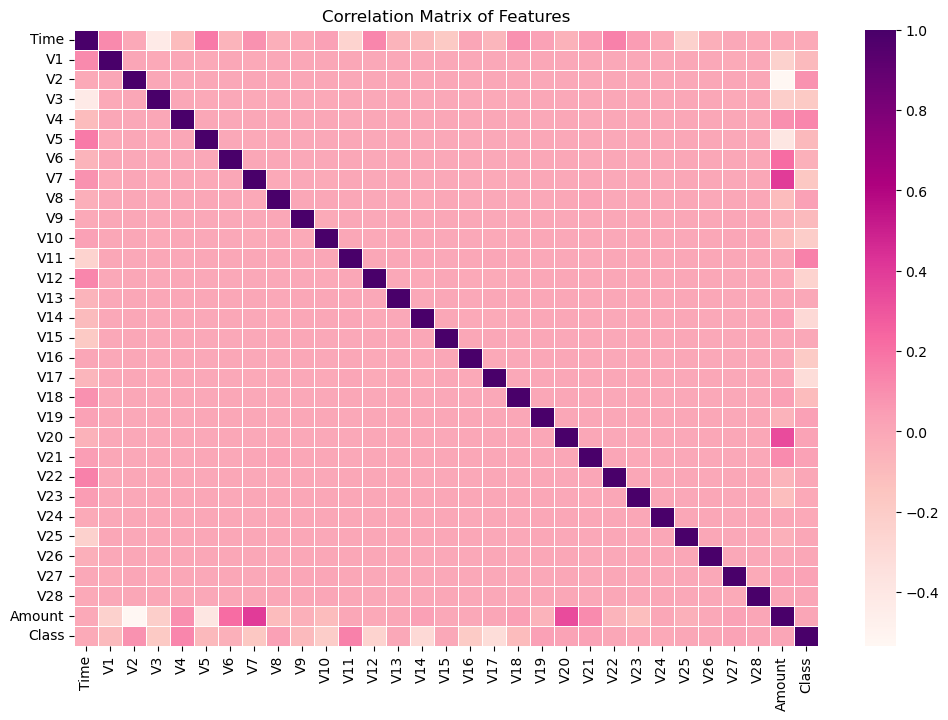

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='RdPu', linewidths=0.5)
plt.title("Correlation Matrix of Features")

### Data Transformation

In [15]:
features_to_scale=['Amount']
data['Amount'] = np.log(data['Amount'] + 1)

In [16]:
data.shape

(283726, 31)

In [17]:
features = ['V10','V11', 'V12', 'V14', 'V15','V16','V17']
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [18]:
data.shape

(283726, 31)

### Feature Engineering

Text(0, 0.5, 'Features')

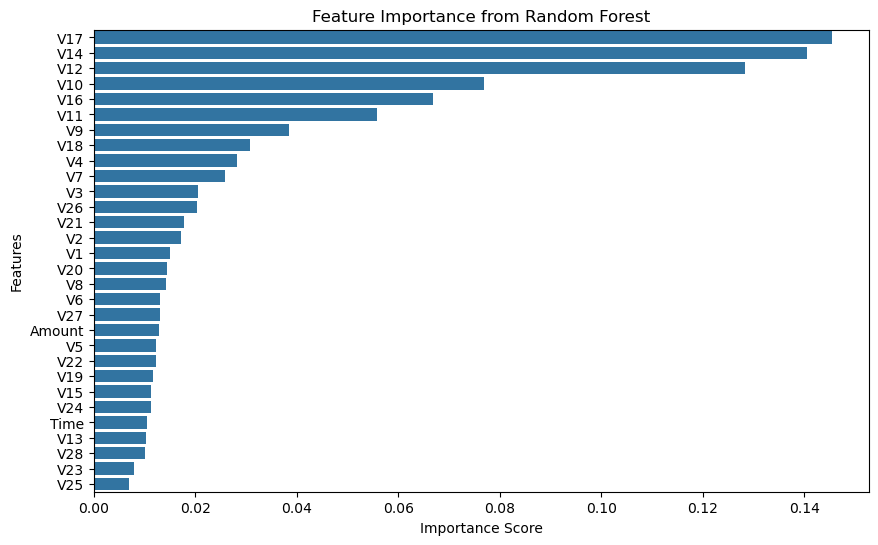

In [19]:
X = data.drop('Class', axis=1) 
y = data['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Get feature importance
importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')

### Handling Imbalanced Data

In [20]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

Class
0    283253
Name: count, dtype: int64
Class
1    473
Name: count, dtype: int64


In [21]:
X = data.drop('Class', axis=1)  
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy=0.6, random_state=42)

In [22]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Before resampling:", Counter(y_train))
print("After resampling:", Counter(y_resampled))

Before resampling: Counter({0: 198269, 1: 339})
After resampling: Counter({0: 198269, 1: 118961})


In [23]:
data = pd.DataFrame(X_resampled, columns=X.columns) 

#Combine the resampled X and y into a new DataFrame
data['Class'] = y_resampled 

In [24]:
data.shape #The original shape was (283726,31)

(317230, 31)

Text(0.5, 1.0, 'Class Distribution (Fraud vs Non-Fraud)')

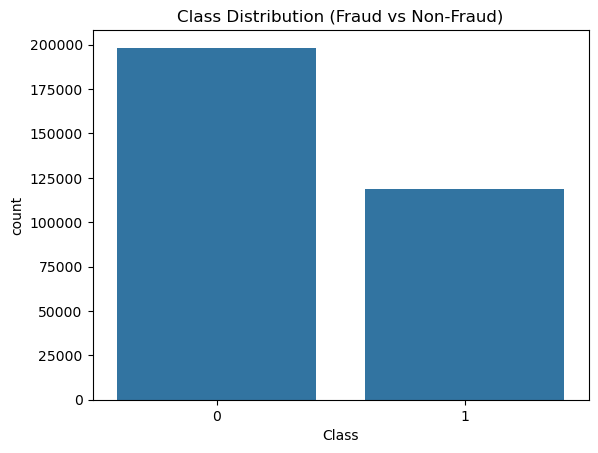

In [25]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")

In [26]:
print(data.duplicated().sum()) #note that No null values will not appear in the newly generated rows

0


In [27]:
print(data[data['Class'] == 0]['Class'].value_counts())
print(data[data['Class'] == 1]['Class'].value_counts())

Class
0    198269
Name: count, dtype: int64
Class
1    118961
Name: count, dtype: int64


### Splitting Data

In [28]:
X = data.drop('Class', axis=1)  
y = data['Class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Selection

In [29]:
classifiers = {
    "LogisticRegression": LogisticRegression(
        penalty='l2',           # L2 regularization to prevent overfitting
        C=2.0,                  # Regularization strength (lower value = stronger regularization)
        solver='liblinear',    
        max_iter=1000           
    ),
    
    "KNearest": KNeighborsClassifier(
         n_neighbors=10,                    
    ),
    
    "XGB Classifier": XGBClassifier(
        max_depth=3,            # Limits the depth of the tree to reduce overfitting
        learning_rate=1,     
        n_estimators=9,      
        subsample=0.8,         
        colsample_bytree=0.8,   
        reg_lambda=1,           # L2 regularization term to prevent overfitting
        reg_alpha=0.2           # L1 regularization term
    ),
    
    "DecisionTreeClassifier": DecisionTreeClassifier(
        max_depth=150,            # Limit depth of the tree to prevent overfitting
        min_samples_split=25,  
        min_samples_leaf=15,     
        max_features='sqrt',   
        ccp_alpha=0.01          
    )
}

### Model Training

In [35]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, pos_label=1):.4f}\n")

Results for LogisticRegression:
Accuracy: 0.9441
Precision: 0.9628
Recall: 0.8847
F1 Score: 0.9221

Results for KNearest:
Accuracy: 0.9222
Precision: 0.9462
Recall: 0.8398
F1 Score: 0.8898

Results for XGB Classifier:
Accuracy: 0.9828
Precision: 0.9846
Recall: 0.9691
F1 Score: 0.9768

Results for DecisionTreeClassifier:
Accuracy: 0.9374
Precision: 0.9633
Recall: 0.8656
F1 Score: 0.9118



for preventing overfitting model : 

In [30]:
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Training data performance
    print(f"Training Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Precision: {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_train, y_train_pred, pos_label=1):.4f}\n")
    
    # Testing data performance
    print(f"Testing Results for {name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"Recall: {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_test_pred, pos_label=1):.4f}\n")

Training Results for LogisticRegression:
Accuracy: 0.9435
Precision: 0.9604
Recall: 0.8859
F1 Score: 0.9217

Testing Results for LogisticRegression:
Accuracy: 0.9441
Precision: 0.9628
Recall: 0.8847
F1 Score: 0.9221

Training Results for KNearest:
Accuracy: 0.9368
Precision: 0.9622
Recall: 0.8657
F1 Score: 0.9114

Testing Results for KNearest:
Accuracy: 0.9222
Precision: 0.9462
Recall: 0.8398
F1 Score: 0.8898

Training Results for XGB Classifier:
Accuracy: 0.9827
Precision: 0.9836
Recall: 0.9701
F1 Score: 0.9768

Testing Results for XGB Classifier:
Accuracy: 0.9828
Precision: 0.9846
Recall: 0.9691
F1 Score: 0.9768

Training Results for DecisionTreeClassifier:
Accuracy: 0.9367
Precision: 0.9637
Recall: 0.8641
F1 Score: 0.9112

Testing Results for DecisionTreeClassifier:
Accuracy: 0.9374
Precision: 0.9633
Recall: 0.8656
F1 Score: 0.9118



### Hyperparameter Tuning

In [31]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for DecisionTreeClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for DecisionTreeClassifier: {grid_search.best_score_:.4f}")

Best parameters for DecisionTreeClassifier: {'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for DecisionTreeClassifier: 0.9962


In [32]:
param_grid = {
   'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear'],
        'max_iter': [100, 200]
}
clf = LogisticRegression()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for LogisticRegressionClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for LogisticRegressionClassifier: {grid_search.best_score_:.4f}")

Best parameters for LogisticRegressionClassifier: {'C': 1.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score for LogisticRegressionClassifier: 0.9609


In [33]:
param_grid = {
   'n_neighbors': [3, 5, 7, 9, 11]
}
clf =KNeighborsClassifier()
grid_search = GridSearchCV(
    clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters for KNeighborsClassifier: {grid_search.best_params_}")
print(f"Best cross-validation score for KNeighborsClassifier: {grid_search.best_score_:.4f}")

Best parameters for KNeighborsClassifier: {'n_neighbors': 3}
Best cross-validation score for KNeighborsClassifier: 0.9265


### Model Evaluation

Model Evaluation Metrics on Test Data:
Accuracy: 0.9828
Precision: 0.9846
Recall: 0.9691
F1 Score: 0.9768
Confusion Matrix:
 [[59037   540]
 [ 1100 34492]]


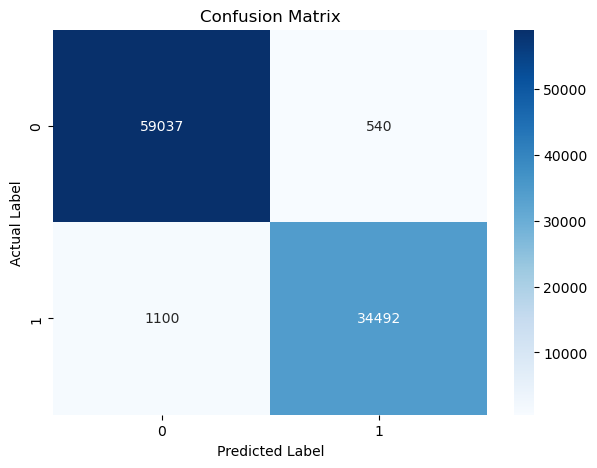

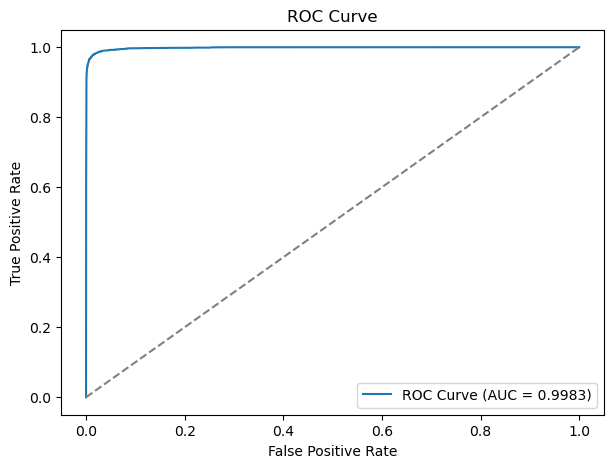

In [34]:
# Predictions using the best model
y_pred = classifiers['XGB Classifier'].predict(X_test)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Evaluation Metrics on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC-AUC Curve
y_test_proba = classifiers['XGB Classifier'].predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()